# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [2]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug



distutils: /opt/conda/include/python3.6m/UNKNOWN
sysconfig: /opt/conda/include/python3.6m
user = False
home = None
root = None
prefix = None


In [3]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3

## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [4]:
#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip dogImages.zip

--2022-09-10 08:24:45--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.193.64
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.193.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  21.3MB/s    in 37s     

2022-09-10 08:25:25 (28.9 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]

Archive:  dogImages.zip
   creating: dogImages/
   creating: dogImages/test/
   creating: dogImages/train/
   creating: dogImages/valid/
   creating: dogImages/test/001.Affenpinscher/
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg  
  inflating: dogImages/test/001.Af

In [6]:
import os
session = sagemaker.Session()
bucket = session.default_bucket()
region = session.boto_region_name
role = sagemaker.get_execution_role()




In [ ]:
os.environ["DEFAULT_S3_BUCKET"] = bucket
!aws s3 sync ./dogImages s3://${DEFAULT_S3_BUCKET}/dogImages/train/

## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [7]:
#TODO: Declare your HP ranges, metrics etc.
from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)



hyperparameter_ranges = {
                        "lr": ContinuousParameter(0.001, 0.1),
                        "batch_size": CategoricalParameter([32, 64, 128, 256, 512]),
                        }

objective_metric_name = "Test Accuracy"
objective_type = "Maximize"
metric_definitions = [{"Name": "Test Accuracy", "Regex": "Test Accuracy: ([0-9\\.]+)"}]
                 

In [8]:
#TODO: Create estimators for your HPs
from sagemaker.pytorch import PyTorch





estimator = PyTorch(
                    entry_point = "hpo.py",
                    base_job_name = "dog-bread-model-pytorch",
                    role = role,
                    instance_count = 1,
                    instance_type = "ml.m5.large",
                    #hyperparameters = hyperparameters,
                    framework_version = "1.8",
                    py_version = "py36",
                    )

tuner = HyperparameterTuner (
                                    estimator,
                                    objective_metric_name,
                                    hyperparameter_ranges,
                                    metric_definitions,
                                    max_jobs=4,
                                    max_parallel_jobs=2,
                                    objective_type=objective_type,
                                    )

In [9]:
data = "s3://" + bucket + "/dogImages/train"
print(data)

s3://sagemaker-us-east-1-286375333242/dogImages/train


In [13]:
# TODO: Fit your HP Tuner

tuner.fit({'train' : data
           }) # TODO: Remember to include your data channels

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config
No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


.............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................!


s3://sagemaker-us-east-1-286375333242/dogImages/train/


In [14]:
# TODO: Get the best estimators and the best HPs

best_estimator = tuner.best_estimator()

#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()


2022-09-11 09:54:15 Starting - Found matching resource for reuse
2022-09-11 09:54:15 Downloading - Downloading input data
2022-09-11 09:54:15 Training - Training image download completed. Training in progress.
2022-09-11 09:54:15 Uploading - Uploading generated training model
2022-09-11 09:54:15 Completed - Resource retained for reuse


{'_tuning_objective_metric': '"Test Accuracy"',
 'batch_size': '"128"',
 'lr': '0.0017187699829208252',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"dog-bread-model-pytorch-2022-09-11-08-37-53-796"',
 'sagemaker_program': '"hpo.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-286375333242/dog-bread-model-pytorch-2022-09-11-08-37-53-796/source/sourcedir.tar.gz"'}

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [27]:
# TODO: Set up debugging and profiling rules and hooks
from sagemaker.debugger import Rule, ProfilerRule, rule_configs

rules = [
         ProfilerRule.sagemaker(rule_configs.LowGPUUtilization()),
         ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
         Rule.sagemaker(rule_configs.loss_not_decreasing()),
         Rule.sagemaker(rule_configs.vanishing_gradient()),
         Rule.sagemaker(rule_configs.overfit()),
         Rule.sagemaker(rule_configs.overtraining()),
         Rule.sagemaker(rule_configs.poor_weight_initialization()),
         ]

from sagemaker.debugger import DebuggerHookConfig, ProfilerConfig, FrameworkProfile, CollectionConfig



profiler_config = ProfilerConfig(
                                 system_monitor_interval_millis = 500, 
                                 framework_profile_params = FrameworkProfile(num_steps=10)
                                 )

collection_configs = [
                     CollectionConfig(
                        name="custom_losses",
                        parameters={
                            "include_regex": "CrossEntropyLoss_output_0",
                            "train.save_interval": "50",
                            "eval.save_interval": "10"
                        }
                    )
                    ]

hook_config = DebuggerHookConfig (
                                 collection_configs = collection_configs
                                 )

In [28]:
# TODO: Create and fit an estimator
hyperparameters = {
                  "epochs" : "5",
                  "batch_size" : "128",
                  "lr": "0.0017"
                  }

estimator = PyTorch(
                    entry_point = "train_my_model.py",
                    base_job_name = "dog-bread-model-pytorch",
                    role = role,
                    instance_count = 1,
                    instance_type = "ml.p3.2xlarge",
                    hyperparameters = hyperparameters,
                    framework_version = "1.8",
                    py_version = "py36",
                    profiler_config = profiler_config,
                    rules = rules,
                    debugger_hook_config = hook_config
                    )



In [29]:
print(hook_config)

In [30]:
data = "s3://" + bucket + "/dogImages/train"
print(data)

s3://sagemaker-us-east-1-286375333242/dogImages/train


In [31]:
estimator.fit(
              {'training' : data + '/train',
               'test'  : data + '/test'}
              
            )

2022-09-16 10:09:24 Starting - Starting the training job...
2022-09-16 10:09:51 Starting - Preparing the instances for trainingLossNotDecreasing: InProgress
VanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
LowGPUUtilization: InProgress
ProfilerReport: InProgress
.........
2022-09-16 10:11:21 Downloading - Downloading input data.........
2022-09-16 10:12:52 Training - Downloading the training image....................bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2022-09-16 10:16:08,787 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2022-09-16 10:16:08,817 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2022-09-16 10:16:08,824 sagemaker_pytorch_container.training INFO     Invoking user training script.
2022-09-16 10:16:09,460 sagemaker-training-toolkit INFO     Invoking user sc

In [32]:
pt_model_data = estimator.model_data
print("Model artifact saved at:\n", pt_model_data)

Model artifact saved at:
 s3://sagemaker-us-east-1-286375333242/dog-bread-model-pytorch-2022-09-16-10-09-24-494/output/model.tar.gz


In [33]:
# TODO: Plot a debugging output.


training_job_name = estimator.latest_training_job.name
print(f"Training jobname: {training_job_name}")
print(f"Region: {region}")

client = estimator.sagemaker_session.sagemaker_client
description = client.describe_training_job(TrainingJobName=estimator.latest_training_job.name)


Training jobname: dog-bread-model-pytorch-2022-09-16-10-09-24-494
Region: us-east-1


In [34]:
from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys

trial = create_trial(estimator.latest_job_debugger_artifacts_path())

[2022-09-16 10:27:08.408 pytorch-1-6-cpu-py36--ml-t3-medium-370ee60fbc7a856e8f67ac271515:35 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2022-09-16 10:27:08.427 pytorch-1-6-cpu-py36--ml-t3-medium-370ee60fbc7a856e8f67ac271515:35 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagemaker-us-east-1-286375333242/dog-bread-model-pytorch-2022-09-16-10-09-24-494/debug-output


In [35]:
trial.tensor_names()

[2022-09-16 10:27:11.306 pytorch-1-6-cpu-py36--ml-t3-medium-370ee60fbc7a856e8f67ac271515:35 INFO trial.py:198] Training has ended, will refresh one final time in 1 sec.
[2022-09-16 10:27:12.333 pytorch-1-6-cpu-py36--ml-t3-medium-370ee60fbc7a856e8f67ac271515:35 INFO trial.py:210] Loaded all steps


['CrossEntropyLoss_output_0',
 'CrossEntropyLoss_output_1',
 'gradient/ResNet_fc.0.bias',
 'gradient/ResNet_fc.0.weight',
 'gradient/ResNet_fc.2.bias',
 'gradient/ResNet_fc.2.weight',
 'layer1.0.relu_input_0',
 'layer1.0.relu_input_1',
 'layer1.1.relu_input_0',
 'layer1.1.relu_input_1',
 'layer2.0.relu_input_0',
 'layer2.0.relu_input_1',
 'layer2.1.relu_input_0',
 'layer2.1.relu_input_1',
 'layer3.0.relu_input_0',
 'layer3.0.relu_input_1',
 'layer3.1.relu_input_0',
 'layer3.1.relu_input_1',
 'layer4.0.relu_input_0',
 'layer4.0.relu_input_1',
 'layer4.1.relu_input_0',
 'layer4.1.relu_input_1',
 'relu_input_0']

In [36]:
print(len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.TRAIN)))
print(len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.EVAL)))

6
4


In [37]:
trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.TRAIN)

[0, 50, 100, 150, 200, 250]

In [38]:
from smdebug import modes
trial.tensor('CrossEntropyLoss_output_0').values(mode=modes.TRAIN)

{0: array(4.960293, dtype=float32),
 50: array(2.0499477, dtype=float32),
 100: array(1.3227049, dtype=float32),
 150: array(1.2449567, dtype=float32),
 200: array(1.0338361, dtype=float32),
 250: array(0.98604757, dtype=float32)}

In [39]:
def get_data(trial, tname, mode):
    tensor = trial.tensor(tname)
    steps = tensor.steps(mode=mode)
    vals = []
    for s in steps:
        vals.append(tensor.value(s, mode=mode))
    return steps, vals

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot


def plot_tensor(trial, tensor_name):

    steps_train, vals_train = get_data(trial, tensor_name, mode=ModeKeys.TRAIN)
    print("loaded TRAIN data")
    steps_eval, vals_eval = get_data(trial, tensor_name, mode=ModeKeys.EVAL)
    print("loaded EVAL data")

    fig = plt.figure(figsize=(10, 7))
    host = host_subplot(111)

    par = host.twiny()

    host.set_xlabel("Steps (TRAIN)")
    par.set_xlabel("Steps (EVAL)")
    host.set_ylabel(tensor_name)

    (p1,) = host.plot(steps_train, vals_train, label=tensor_name)
    print("completed TRAIN plot")
    (p2,) = par.plot(steps_eval, vals_eval, label="val_" + tensor_name)
    print("completed EVAL plot")
    leg = plt.legend()

    host.xaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())

    par.xaxis.get_label().set_color(p2.get_color())
    leg.texts[1].set_color(p2.get_color())

    plt.ylabel(tensor_name)

    plt.show()

loaded TRAIN data
loaded EVAL data
completed TRAIN plot
completed EVAL plot


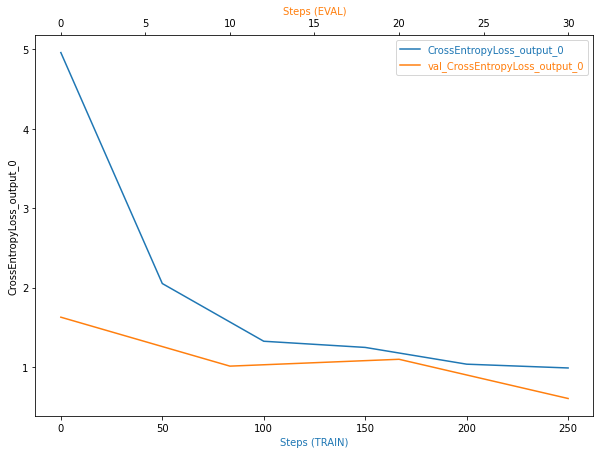

In [40]:
plot_tensor(trial, "CrossEntropyLoss_output_0")

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

In [41]:
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"

In [42]:
! aws s3 ls {rule_output_path} --recursive

2022-09-16 10:26:20     438276 dog-bread-model-pytorch-2022-09-16-10-09-24-494/rule-output/ProfilerReport/profiler-output/profiler-report.html
2022-09-16 10:26:19     297552 dog-bread-model-pytorch-2022-09-16-10-09-24-494/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2022-09-16 10:26:15        552 dog-bread-model-pytorch-2022-09-16-10-09-24-494/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2022-09-16 10:26:15      42875 dog-bread-model-pytorch-2022-09-16-10-09-24-494/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2022-09-16 10:26:15       1930 dog-bread-model-pytorch-2022-09-16-10-09-24-494/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json
2022-09-16 10:26:15        130 dog-bread-model-pytorch-2022-09-16-10-09-24-494/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
2022-09-16 10:26:15       8408 dog-bread-model-pytorch-2022-09-16-10-09-24-494/rule-

In [43]:
! aws s3 cp {rule_output_path} ./ --recursive

download: s3://sagemaker-us-east-1-286375333242/dog-bread-model-pytorch-2022-09-16-10-09-24-494/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json to ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
download: s3://sagemaker-us-east-1-286375333242/dog-bread-model-pytorch-2022-09-16-10-09-24-494/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json to ProfilerReport/profiler-output/profiler-reports/Dataloader.json
download: s3://sagemaker-us-east-1-286375333242/dog-bread-model-pytorch-2022-09-16-10-09-24-494/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json to ProfilerReport/profiler-output/profiler-reports/BatchSize.json
download: s3://sagemaker-us-east-1-286375333242/dog-bread-model-pytorch-2022-09-16-10-09-24-494/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json to ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
download: s3://sagemaker-u

In [44]:
import os

# get the autogenerated folder name of profiler report
profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]

In [45]:
import IPython

IPython.display.HTML(filename=profiler_report_name + "/profiler-output/profiler-report.html")

## Model Deploying

Due to the transformation, need to create a transform.py file that applied the same transformation done during the train

In [65]:
from sagemaker.pytorch import PyTorchModel

pytorch_model = PyTorchModel(
                             model_data = estimator.model_data, 
                             role = role, 
                             entry_point = 'transform.py', 
                             py_version = 'py36',
                             framework_version = '1.8'
                            )


predictor = pytorch_model.deploy(
                                initial_instance_count = 1, 
                                instance_type = 'ml.m5.xlarge'
                                )

INFO:sagemaker:Creating model with name: pytorch-inference-2022-09-16-11-10-06-857
INFO:sagemaker:Creating endpoint with name pytorch-inference-2022-09-16-11-10-07-407


------!

In [78]:
endpoint_name = predictor.endpoint_name

print("The endpoint name is:")
print(endpoint_name)

The endpoint name is:
pytorch-inference-2022-09-16-11-10-07-407


The dog photo used to do the prediction is:


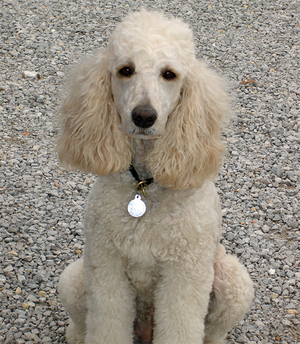

The label of the image is 124
The prediction given by the machine learning model is 124

The dog photo used to do the prediction is:


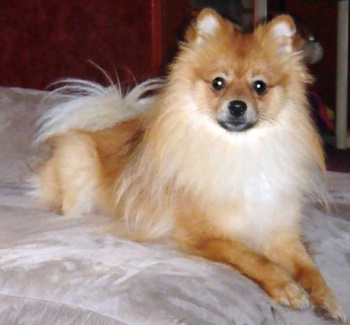

The label of the image is 123
The prediction given by the machine learning model is 123

The dog photo used to do the prediction is:


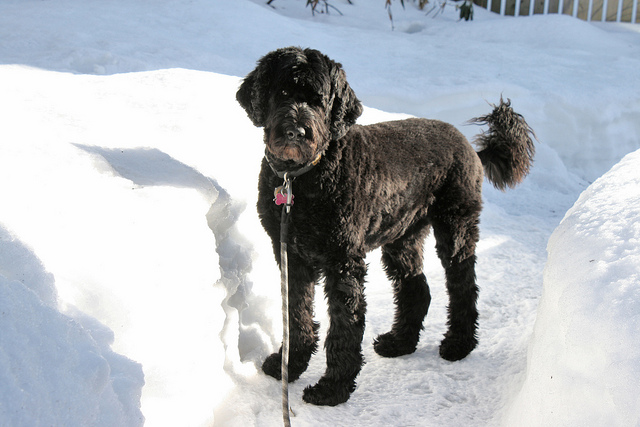

The label of the image is 125
The prediction given by the machine learning model is 78



In [90]:
from sagemaker.serializers import IdentitySerializer

predictor.serializer = IdentitySerializer("image/jpeg")
jpeg_serializer = IdentitySerializer("image/jpeg")


from PIL import Image

files = [
    './dogImages/test/124.Poodle/Poodle_07949.jpg', 
    './dogImages/test/123.Pomeranian/Pomeranian_07858.jpg',
    './dogImages/test/125.Portuguese_water_dog/Portuguese_water_dog_07971.jpg',
    ]
    
for file in files:
    # Getting labels
    target_str = 'test/'
    in_pos = file.index(target_str) + len(target_str)
    label = int(file[in_pos:in_pos+3])
    
    # Displaying image to be predicted
    img = Image.open(file)
    print('The dog photo used to do the prediction is:')
    display(img)
    
    # Querying endpoint
    image = open(file, 'rb').read()
    response = predictor.predict(image, initial_args={'ContentType':'image/jpeg'})
    prediction = np.argmax(response[0]) + 1    
    
    print(f'The label of the image is {label}')
    print(f'The prediction given by the machine learning model is {prediction}\n')

# image = # TODO: Your code to load and preprocess image to send to endpoint for prediction
# response = predictor.predict(image)

## Loading a docker Image

In [91]:
import boto3

client=boto3.client('sts')
account=client.get_caller_identity()['Account']

my_session=boto3.session.Session()
region=my_session.region_name

algorithm_name="pytochcontainertest9"
ecr_image='{}.dkr.ecr.{}.amazonaws.com/{}:latest'.format(account, region, algorithm_name)

ecr_image

'286375333242.dkr.ecr.us-east-1.amazonaws.com/pytochcontainertest9:latest'

In [92]:
import sagemaker

from sagemaker import get_execution_role
from sagemaker.estimator import Estimator

estimator=Estimator(
    image_uri=ecr_image,
    role=get_execution_role(),
    base_job_name='pytochcontainertest9',
    instance_count=1,
    instance_type='ml.p2.xlarge'
)



In [ ]:
estimator.fit()

In [ ]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()